## 牛顿法

这一节我们来使用牛顿法做优化, 之前在一维搜索方法中提到过牛顿法, 即为使用二次函数来近似某点周围的函数, 从而达到简化问题的效果. 本节也是通过类似的方法来实现函数的极值的求解的.

假定有一个函数 $f = f(x)$, 在 $x = x_{0}$处用泰勒展开有
$$f(x) \sim f(x_{0}) + (x - x_{0})^{T} g(x_{0})  + \frac{1}{2} (x - x_{0})^{T}D(x_{0})(x-x_{0}) = p(x)$$
我们将在这里将$f(x)$在$x_{0}$附近近似为$p(x)$, 所以只需要求出$p(x)$的极值即可近似求解出$f(x)$的极值.

这里我们求解$p(x)$的梯度等于零, 有

$$\nabla p(x) = g(x_{0}) + D(x_{0})(x-x_{0}) = 0$$
从而容易得出迭代公式
$$ x_{k+1} = x_{k} - D(x_{k})^{-1}g(x_{k})$$

下面举一个例子, 对于一个正定二次型函数 $$f(x) = x^{2} + 100y^{2}+ xy$$
梯度为 $$g(x) = (2x +y, 200y+x)^{T}$$
Hessian 矩阵为 $$H = [2,1;1,200]$$

In [1]:
import numpy as np
def Newton_method(g, H, init_point):
    path = [init_point.reshape((len(g),))]
    g_val = np.array([g[i](*init_point) for i in range(len(g))])
    g_val = np.reshape(g_val, (len(g), 1))
    while  np.sum(abs(g_val), axis=0)[0]> 0.01:
        init_point = init_point - np.dot(np.linalg.inv(H), g_val)
        g_val = np.array([g[i](*init_point) for i in range(len(g))])
        g_val = np.reshape(g_val, (len(g), 1))
        path.append(init_point.reshape((len(g),)))
    return init_point, path

if __name__ == "__main__":
    f = lambda x, y:x**2+100*y**2+x*y
    g = [lambda x, y:2*x+y, lambda x, y:200*y+x];
    H = np.array([[2,1], [1, 200]])
    init_point = np.array([100,1]).reshape((2,1))
    point, path = Newton_method(g, H, init_point)
    print('Final point:', point, '\n and the path is:\n', path)

Final point: [[0.]
 [0.]] 
 and the path is:
 [array([100,   1]), array([0., 0.])]


这里可以看到, 在二次型函数上, 牛顿法可以一步达到极小值点, 这也是很显然的, 因为牛顿法近似拟合的函数是可以得到它的极小值, 而牛顿法对于二次型函数的拟合就是原函数.

对于非二次型函数, 例如Powell函数
$$f = (x_{1}+10x_{2})^{2} + 5(x_{3} - x_{4})^{2} + (x_{2}-2x_{3})^{4} + 10(x_{1}-x_{4})^{4}$$
设置起始点为 $x = [3, -1, 0, 1]^{T}$.

梯度为 $$g = [2(x_{1}+10x_{2})^{2}, 20(x_{1}+10x_{2})+4(x_{2}-2x_{3})^{3}, 10(x_{3}-x_{4})-8(x_{2}-2x_{3})^{3},
-10(x_{3}-x_{4})-40(x_{1}-x_{4})^{3}]$$
Hessian 矩阵
$$
 H = \left[
 \begin{matrix}
   2+120(x_{1}-x_{4})^{2} & 20 & 0 &-120(x_{1}-x_{4})^{2} \\
   20 & 200+12(x_{2}-2x_{3})^{2} & -24(x_{2}-2x_{3})^{2}&0 \\
   0 & -24(x_{2}-2x_{3})^{2} & 10+48(x_{2}-2x_{3})^{2}&-10\\
   -120(x_{1}-x_{4})^{2}&0&-10&10+120(x_{1}-x_{4})^{2}\\
  \end{matrix}
  \right] 
$$

In [2]:
import numpy as np
def Newton_method_std(g, H, init_point):
    path = [init_point.reshape((len(g),))]
    g_val = np.array([g[i](*init_point) for i in range(len(g))]).reshape((len(g), 1))
    while  np.sum(abs(g_val), axis=0)[0]> 0.0001:
        H_val = np.zeros((len(g), len(g)))
        for ii in range(len(g)):
            for jj in range(len(g)):
                H_val[ii, jj] = H[ii][jj](*init_point)
        init_point = init_point - np.dot(np.linalg.inv(H_val), g_val)
        g_val = np.array([g[i](*init_point) for i in range(len(g))]).reshape((len(g), 1))
        path.append(init_point.reshape((len(g),)))
    return init_point, path
if __name__ == "__main__":
    f = lambda x1,x2,x3,x4:(x1+10*x2)**2+5*(x3-x4)**2+(x2-2*x3)**4+10*(x1-x4)**4
    g = [lambda x1,x2,x3,x4:2*(x1+10*x2)+40*(x1-x4)**3, 
         lambda x1,x2,x3,x4:20*(x1+10*x2)+4*(x2-2*x3)**3,
         lambda x1,x2,x3,x4:10*(x3-x4)-8*(x2-2*x3)**3, 
         lambda x1,x2,x3,x4:-10*(x3-x4)-40*(x1-x4)**3];
    H = [[lambda x1,x2,x3,x4:2+120*(x1-x4)**2,lambda x1,x2,x3,x4:20,
          lambda x1,x2,x3,x4:0,lambda x1,x2,x3,x4:-120*(x1-x4)**2], 
         [lambda x1,x2,x3,x4:20,lambda x1,x2,x3,x4:200+12*(x2-2*x3)**2,
          lambda x1,x2,x3,x4:-24*(x2-2*x3)**2,lambda x1,x2,x3,x4:0], 
         [lambda x1,x2,x3,x4:0, lambda x1,x2,x3,x4:-24*(x2-2*x3)**2,
          lambda x1,x2,x3,x4:10+48*(x2-2*x3)**2,lambda x1,x2,x3,x4:-10], 
        [lambda x1,x2,x3,x4:-120*(x1-x4)**2,lambda x1,x2,x3,x4:0,
          lambda x1,x2,x3,x4:-10,lambda x1,x2,x3,x4:10+120*(x1-x4)**2]]
    init_point = np.array([3, -1, 0, 1]).reshape((4,1))
    point, path = Newton_method_std(g, H, init_point)
    print('Final point:\n', point, '\nthe minmum function value is:\n',
          f(*point), '\n and the time of iteration is:', len(path))

Final point:
 [[ 0.01223388]
 [-0.00122339]
 [ 0.00195742]
 [ 0.00195742]] 
the minmum function value is:
 [1.1222262e-07] 
 and the time of iteration is: 14


可以看到牛顿法的收敛速度是相当快速的, 但是这里同样的代价是求解的复杂度也变高了. 第一, 需要计算Hessian矩阵, 第二, 需要计算该矩阵的逆. 这二者都需要花费较大的代价. 因此我们需要有一些更好的方法进行改进. 同时更重要滴, 有时候Hessian矩阵并不可以使得搜索方向的目标函数下降的方向. 一般该种情况出现在Hessian矩阵非正定的时候, 但是有时候即使正定也会导致该种情况的出现, 而且有时候Hessian矩阵可能接近奇异, 导致其逆矩阵求解误差很大. 关于这一点, 我们可以通过LM方法来修正并改善牛顿法.

## Levenberg-Marquardt 修正

这里是实质上就引入了矩阵的对角元的修正, 也即为将把迭代公式修正为
$$x_{k+1} = x_{k} - (D_{k}+\mu_{k}I)^{-1}g_{k}$$

这里如果$\mu_{k}$足够大, 就可以使得$G = D_{k}+\mu_{k}I$为正定矩阵, 并且当$\mu_{k}$很大时, 该方法也即为梯度下降法, 而当$\mu_{k} \rightarrow 0$时, 该方法仍然为牛顿法. 因此平衡好$\mu_{k}$的取值将非常重要. 一般为, 先取$\mu_{k}$很小, 然后慢慢变大, 直到出现下降特性为止.

考虑一种特殊的优化问题, 并尝试使用牛顿法解决. 优化问题为:
$$\min f, f =  \sum_{i = 1}^{m}r_{i}(\vec{x})^{2}$$

其中$r_{i}: R^{n}\rightarrow R, i = 1,2,3...m$. 该种问题称为非线性的的最小二乘法问题.

这里考虑该问题的解决方法. 首先求解$f$的梯度, 也即为

$$g(x_{j}) = 2\sum_{i=1}^{m}\frac{\partial r_{i}}{\partial x_{j}}$$
如果我们引入雅克比矩阵, 可以得出
$$g = 2J^{T}r$$
而Hessian矩阵的第j行第k列, 也即为也即为
$$H(j, k) = \frac{\partial ^{2}f}{\partial x_{j}\partial x_{k}} = \frac{\partial }{\partial x_{j}}(\sum_{i=1}^{m}2r_{i}\frac{\partial r_{i}}{\partial x_{k}})\\
=2\sum_{i=1}^{m}(\frac{\partial r_{i}}{\partial x_{j}}\frac{\partial r_{i}}{\partial x_{k}} + r_{i}\frac{\partial^{2}r_{i}}{\partial x_{j}\partial x_{k}})$$
写成矩阵的形式也即为
$$H = 2(J^{T}J+S)$$
其中$S$的矩阵元为$r_{i}\frac{\partial^{2}r_{i}}{\partial x_{j}\partial x_{k}}$. 但是一般来说, $S$的矩阵元很小(由于二阶偏导数的缘故), 所以我们可以舍去, 那么该问题也即为转化为
$$x_{k+1} = x_{k} - (J^{T}J)^{-1}J^{T}r_{k}$$
该公式也即为所谓的高斯-牛顿法. 注意到该方法不需要计算二阶导数. 但是实际上可能会碰到$J^{T}J$不正定的问题, 使用LM修正将会是一个很好的方法.事实上该方法的提出正是为了解决$J^{T}J$不正定的问题.
$$x_{k+1} = x_{k} - (J^{T}J + \mu_{k}I)^{-1}J^{T}r_{k}$$

下面我们举一个拟合正弦函数的例子

In [3]:
n = 21
t = np.linspace(0, 2*np.pi, n)
rand_ = 0.1*np.random.rand(n)
y = 6*np.sin(t+0.5)+rand_# 这是我们设置好的参数

这里要拟合的函数为$$y = x_{1}\sin(x_{2}t+x_{3})$$
因此我们有 $$\frac{\partial r}{\partial x_{1}} = \sin(x_{2}t+x_{3})\\
\frac{\partial y}{\partial x_{2}} = x_{1}t\cos(x_{2}t+x_{3})\\
\frac{\partial y}{\partial x_{3}} = x_{1}\cos(x_{2}t+x_{3})$$

In [4]:
x = np.array([1, 1, 1]).reshape((3,1))
g_r0 = lambda x1,x2,x3,t:-np.sin(x2*t+x3)
g_r1 = lambda x1,x2,x3,t:-x1*t*np.cos(x2*t+x3)
g_r2 = lambda x1,x2,x3,t:-x1*np.cos(x2*t+x3)
y_fun = lambda x1,x2,x3,t:x1*np.sin(x2*t+x3)
step = 0.1
for it in range(100):
    J, r = np.zeros((n, 3)), np.zeros((n, 1))
    for ii in range(n):
        J[ii, 0], J[ii,1], J[ii, 2] = g_r0(*x, t=t[ii]), g_r1(*x, t=t[ii]), g_r2(*x, t=t[ii])
        r[ii] = y[ii] - y_fun(*x, t=t[ii])
        tmp = np.dot(J.T, J)
        mu = 0.1
    x = x - step*np.dot(np.dot(np.linalg.inv(tmp+mu*np.diag([1,1,1])), J.T), r)
    yy = np.sum(abs(r))
    if yy<1:
        break
print(x)

[[6.01453009]
 [1.00247844]
 [0.49180611]]


In [5]:
import matplotlib.pyplot as plt
plt.plot(t, y,'o',label='original data')
plt.plot(t, y.reshape((n,1))-r, label='fitting')
plt.legend()
plt.show()
# 可以看到, 牛顿法给出的拟合效果是很好的. 

最后我们将此方法整理一下, 因为牛顿法可能有时候会不收敛, 所以引入一个步长将会是很好的选择. 也即为我们可以把牛顿法修正为

$$x_{k+1} = x_{k} - \alpha_{k}D^{-1}_{k}g_{k}$$

其中$$\alpha_{k} = argmin~~f( x_{k} - \alpha D^{-1}_{k}g_{k})$$
也即为对$\alpha$ 展开一维搜索.

## 高斯-牛顿法

这里我们使用黄金分割法进行一维搜索.

In [6]:
import numpy as np

class OneDOptAlgo(object):
    
    def __init__(self, f, except_inter=1e-3):
        self.f = f # here f is a one dimension function 
        self.except_inter = except_inter
        
    def golden_division(self, inter):
        """
        f is the given function, iter is the interval that variable belongs to
        and err is the error you can tolerate
        """
        rho = (3 - np.sqrt(5))/2
        old_inter = abs(inter[0]- inter[1])
        while old_inter > self.except_inter:
            interval = inter[1] - inter[0]
            new_inter_0 = inter[0] + rho*interval
            new_inter_1 = inter[0] + (1 - rho)*interval
            if self.f(new_inter_0) < self.f(new_inter_1):
                inter = [inter[0], new_inter_1]
            else:
                inter = [new_inter_0, inter[1]]
            old_inter = abs(inter[0] - inter[1])
        return inter

这里加入对步长step的一维搜索, 上面的代码是直接设置的0.1

In [7]:
def get_step(step):
    x = old_x - step*np.dot(np.dot(np.linalg.inv(tmp+mu*np.diag([1,1,1])), J.T), r)
    new_r = np.zeros((n, 1))
    for ii in range(n):
        new_r[ii] = y[ii] - y_fun(*x, t=t[ii])
    err = np.sum(abs(new_r))
    return err

n = 20
t = np.linspace(0, 2*np.pi, n)
rand_ = 0.1*np.random.rand(n)
y = 8*np.sin(2*t+2.5)+rand_# 这是我们设置好的参数

old_x = np.array([1, 1, 1]).reshape((3,1))
g_r0 = lambda x1,x2,x3,t:-np.sin(x2*t+x3)
g_r1 = lambda x1,x2,x3,t:-x1*t*np.cos(x2*t+x3)
g_r2 = lambda x1,x2,x3,t:-x1*np.cos(x2*t+x3)
y_fun = lambda x1,x2,x3,t:x1*np.sin(x2*t+x3)

for it in range(1000):
    J, r = np.zeros((n, 3)), np.zeros((n, 1))
    for ii in range(n):
        J[ii, 0], J[ii,1], J[ii, 2] = g_r0(*old_x, t=t[ii]), g_r1(*old_x, t=t[ii]), g_r2(*old_x, t=t[ii])
        r[ii] = y[ii] - y_fun(*old_x, t=t[ii])
        tmp = np.dot(J.T, J)
        mu = 0.1
    # one-D search for the optimum step 
    inter = [0, 1]
    opt_inter = OneDOptAlgo(get_step, except_inter=1e-1).golden_division(inter)
    old_x = old_x - opt_inter[0]*np.dot(np.dot(np.linalg.inv(tmp+mu*np.diag([1,1,1])), J.T), r)
    if sum(abs(r)) < 1.5:
        break
        

print('coef_:\n', old_x, '\nerr:\n', sum(abs(r)))

coef_:
 [[ 7.9845234 ]
 [ 2.00055441]
 [-3.78720095]] 
err:
 [0.92458737]


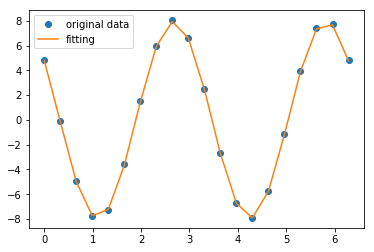

In [8]:
plt.plot(t, y,'o',label='original data')
plt.plot(t, y.reshape((n,1))-r, label='fitting')
plt.legend()
plt.show()

这里不得不提及, 牛顿法的收敛性是不好的. 即便Hessian矩阵是正定的, 也可能会出现不收敛的情况.